Jiya Sharma : 22311741

Assignment - 5

Write a program to do following:
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
This dataset givesthe data of Income and money spent by the customers visiting a shopping
mall.
The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore,
asa mall owner you need to find the group of people who are the profitable customers for the
mallowner. Apply at least two clustering algorithms (based on Spending Score) to find the
group ofcustomers.
a) Apply Data pre-processing
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.
e) Apply Cross-Validation and Evaluate Mode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Genre'] = le.fit_transform(dataset['Genre'])

In [10]:
dataset['Genre']

,Genre
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [12]:
# Feature selection for clustering (Annual Income & Spending Score)
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#Data Preparation (Train-Test Split)
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


In [15]:
# 1. K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import AgglomerativeClustering
wcss = []
k_range = range(2, 11)  # Trying different cluster numbers
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

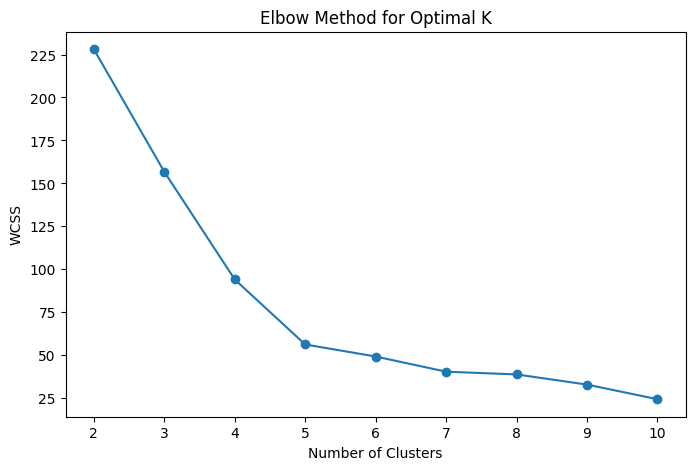

In [16]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [17]:
# Applying K-Means with optimal K=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
dataset["KMeans_Cluster"] = kmeans_labels

In [18]:
# 2. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
dataset["Agglo_Cluster"] = agglo_labels

In [19]:
# d) Evaluate Model
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Agglomerative Clustering Silhouette Score:", silhouette_score(X_scaled, agglo_labels))


K-Means Silhouette Score: 0.5546571631111091
Agglomerative Clustering Silhouette Score: 0.5538089226688662


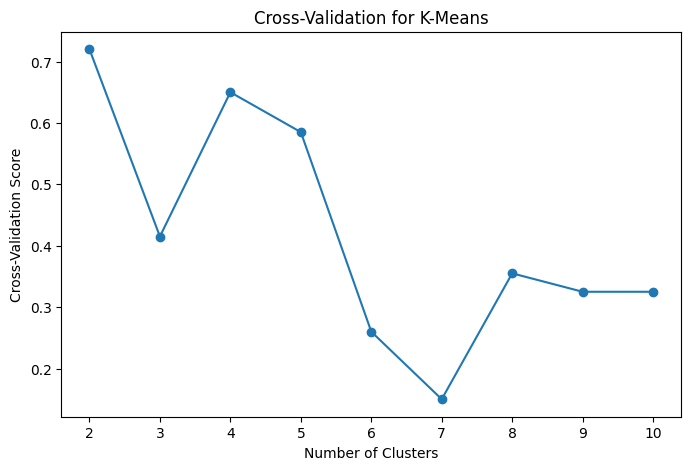

In [20]:
# e) Cross-Validation for K-Means
cv_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    scores = cross_val_score(kmeans, X_scaled, np.zeros(len(X_scaled)), cv=5, scoring='accuracy', error_score='raise')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation for K-Means')
plt.show()

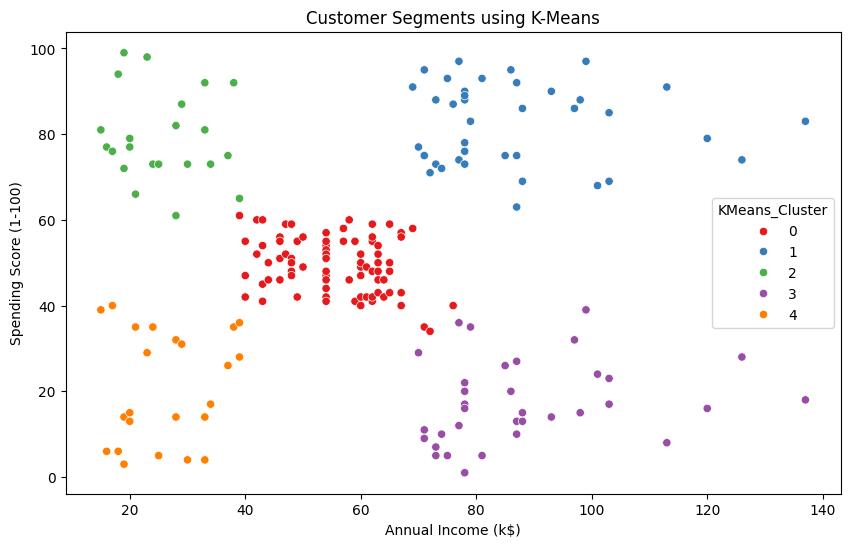

In [23]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Annual Income (k$)'], y=dataset['Spending Score (1-100)'], hue=dataset['KMeans_Cluster'], palette='Set1')
plt.title('Customer Segments using K-Means')
plt.show()

K-fold cross validation

In [24]:
import numpy as np
from sklearn.model_selection import KFold
x = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4,5,6])
kf = KFold(n_splits=2)
for train_index,test_index in kf.split(x):
  print("Train:",train_index,"Test:",test_index)

Train: [2 3] Test: [0 1]
Train: [0 1] Test: [2 3]


leave-one out cross validation

In [27]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
x = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])
loo = LeaveOneOut()
for train_index,test_index in loo.split(x):
  print("Train:",train_index,"Test:",test_index)

Train: [1 2 3] Test: [0]
Train: [0 2 3] Test: [1]
Train: [0 1 3] Test: [2]
Train: [0 1 2] Test: [3]


leave-p out cross validation

In [28]:
import numpy as np
from sklearn.model_selection import LeavePOut
x = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])
lpo = LeavePOut(2)
for train_index,test_index in lpo.split(x):
  print("Train:",train_index,"Test:",test_index)

Train: [2 3] Test: [0 1]
Train: [1 3] Test: [0 2]
Train: [1 2] Test: [0 3]
Train: [0 3] Test: [1 2]
Train: [0 2] Test: [1 3]
Train: [0 1] Test: [2 3]


stratified k-fold cross validation

In [29]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
x = np.array([[1,2],[3,4],[1,2],[3,4],[2,3],[2,3]])
y = np.array([0,0,1,1,4,2])
skf = StratifiedKFold(n_splits=2)
for train_index,test_index in skf.split(x,y):
  print("Train:",train_index,"Test:",test_index)
#

Train: [1 3 5] Test: [0 2 4]
Train: [0 2 4] Test: [1 3 5]


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Repeated k-fold

In [30]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
x = np.array([[1,2],[3,4],[1,2],[3,4],[2,3],[2,3]])
y = np.array([0,0,1,1,4,2])
rkf = RepeatedKFold(n_splits=2,n_repeats=3)
for train_index,test_index in rkf.split(x,y):
  print("Train:",train_index,"Test:",test_index)

Train: [0 3 5] Test: [1 2 4]
Train: [1 2 4] Test: [0 3 5]
Train: [0 1 5] Test: [2 3 4]
Train: [2 3 4] Test: [0 1 5]
Train: [3 4 5] Test: [0 1 2]
Train: [0 1 2] Test: [3 4 5]
